<a href="https://colab.research.google.com/github/Soukainaz/Human-Bot-Bidders/blob/main/Human_or_Robot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
# Data Manipulation
import pandas as pd
import numpy as np

In [ ]:
# DataViz
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [ ]:
# Train & test datasets split
from sklearn.model_selection import train_test_split

# Standardization
from sklearn.preprocessing import StandardScaler

# Oversampling
from imblearn.over_sampling import SMOTE

In [ ]:
# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Metrics & Report
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Data Preprocessing

## Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path Soukaina
#path = '/content/drive/MyDrive/Machine Learning/Devoir/'
# Path Ibrahim
path = '/content/drive/MyDrive/IntroductionML/'
bids = pd.read_csv(path + 'bids.csv')
bidders = pd.read_csv(path + 'bidders.csv')

In [ ]:
print('Bids shape :', bids.shape)
print('Bidders shape :', bidders.shape)

Bids shape : (7656334, 9)
Bidders shape : (2013, 4)


In [ ]:
bids.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [ ]:
bidders.head()

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0


## Join Data

In [ ]:
# Join both datasets
data = pd.merge(bids, bidders, on='bidder_id',how='inner')

In [ ]:
data.shape

(3071224, 12)

In [ ]:
data.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,payment_account,address,outcome
0,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0
1,25,668d393e858e8126275433046bbd35c6tywop,38v0a,furniture,phone4,9759243315789473,bd,147.64.206.30,vasstdc27m7nks3,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0
2,39,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone35,9759243368421052,in,75.11.239.20,i92xwb95qdo901j,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0
3,42,668d393e858e8126275433046bbd35c6tywop,jkyzt,furniture,phone38,9759243368421052,in,215.203.78.242,s4hrzaqd5vbq2he,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0
4,68,668d393e858e8126275433046bbd35c6tywop,h2xrf,furniture,phone57,9759243526315789,in,134.198.237.242,1euklxshlldto4z,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0


In [ ]:
data.tail()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,payment_account,address,outcome
3071219,7617228,1dab9ffc5c6bf06e86e0dd1b3cb9ebecn5pu6,jqx39,jewelry,phone65,9709041947368421,cn,90.168.76.210,vasstdc27m7nks3,a3d2de7675556553a5f08e4c88d2c228wissi,502100bcbbe650810a27b0e70d96372ere7rp,0.0
3071220,7637097,91c749114e26abdb9a4536169f9b4580huern,jqx39,jewelry,phone15,9709134105263157,id,221.143.27.57,pkegaymari9jblo,a3d2de7675556553a5f08e4c88d2c228tekzv,2cffbc8171f2ef4b5cafe94f038c877bcert5,1.0
3071221,7639758,a06311ea45de34bf667b79a92d13c764i6aiy,cy43h,sporting goods,phone142,9709146315789473,in,108.54.134.235,xe4uylmhtrsvss1,a3d2de7675556553a5f08e4c88d2c2284grjh,e1ef795abd4f178f753542cbbf54ce89jcfxk,0.0
3071222,7651414,dfb23124fba16b7778f65c1c8d091f949jz0k,y3n7r,mobile,phone21,9709200631578947,in,95.158.193.99,qctqqhoxoicvck1,4c94a221dc03977b5bf3f2035379797cn4n58,65d747de6c1cca49af4c0c27a5b7e8c7tti5y,0.0
3071223,7651994,01f498a0992d280de63ec346692efb2blckg2,9br8v,jewelry,phone457,9709203210526315,in,7.123.42.157,6aw2f4acgfy6qf1,d817b2cf2acb3ccbd33c306831950345h2vb5,7a6f24d2b51620605da00bda42691f30697ky,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3071224 entries, 0 to 3071223
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   bid_id           int64  
 1   bidder_id        object 
 2   auction          object 
 3   merchandise      object 
 4   device           object 
 5   time             int64  
 6   country          object 
 7   ip               object 
 8   url              object 
 9   payment_account  object 
 10  address          object 
 11  outcome          float64
dtypes: float64(1), int64(2), object(9)
memory usage: 304.6+ MB


## Clean Data: Checking Missing Values

In [ ]:
data.isnull().sum()

bid_id                0
bidder_id             0
auction               0
merchandise           0
device                0
time                  0
country            2701
ip                    0
url                   0
payment_account       0
address               0
outcome               0
dtype: int64

The 'country' variable is the sole variable in the dataset that displays missing values.








In [ ]:
missing_ratio = data['country'].isnull().mean() * 100
print(f"{missing_ratio:.2f}% of observations have missing country values.")

0.09% of observations have missing country values.


Since the missing entries represent merely 0.09% of the whole dataset, we will just ignore these observations

In [ ]:
data = data.dropna()

In [ ]:
# Verifying the missing values in the dataset
data.isnull().sum()

bid_id             0
bidder_id          0
auction            0
merchandise        0
device             0
time               0
country            0
ip                 0
url                0
payment_account    0
address            0
outcome            0
dtype: int64

## Data Cleaning: Checking for duplicates

In [ ]:
data.duplicated().sum()

0

After verification, there are no duplicated entries in the dataset.

## Exploratory Data Analysis

In [ ]:
data.nunique()

bid_id             3068523
bidder_id             1983
auction              12740
merchandise             10
device                5726
time                742582
country                198
ip                 1028810
url                 663265
payment_account       1983
address               1983
outcome                  2
dtype: int64

The dataset encompasses more than 3 million distinct bids made merely by 2K unique bidders, across a selection of 10 merchandise options.

In [ ]:
print('outcome:')
print(data['outcome'].value_counts())

outcome:
0.0    2656370
1.0     412153
Name: outcome, dtype: int64


In [ ]:
outcome_counts = data['outcome'].value_counts()

# Calculate the ratio
ratio = outcome_counts[1] / outcome_counts[0]

print(f"The ratio Human vs. Bot is: {ratio:.4f}")

The ratio Human vs. Bot is: 0.1552


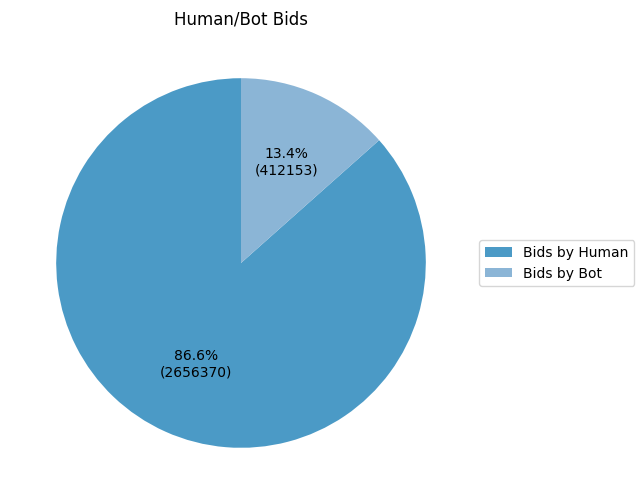

In [ ]:
outcome_counts = data['outcome'].value_counts()

# Plot pie chart with both percentages and value counts inside
colors = ['#4B9AC6','#8BB5D6']
plt.figure(figsize=(6, 6))
plt.pie(outcome_counts, labels=None, autopct=lambda p: f'{p:.1f}%\n({int(p * sum(outcome_counts) / 100)})',
        startangle=90, colors=colors)
plt.title('Human/Bot Bids')


legend_labels = ['Bids by Human', 'Bids by Bot']
plt.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


In [ ]:
average_bids_per_robot = data[data['outcome'] == 1].groupby('bidder_id')['bid_id'].count().mean()
average_bids_per_human = data[data['outcome'] == 0].groupby('bidder_id')['bid_id'].count().mean()

average_bids_per_auction_robot = data[data['outcome'] == 1].groupby('auction')['bid_id'].count().mean()
average_bids_per_auction_human = data[data['outcome'] == 0].groupby('auction')['bid_id'].count().mean()

average_bids_per_device_robot = data[data['outcome'] == 1].groupby('device')['bid_id'].count().mean()
average_bids_per_device_human = data[data['outcome'] == 0].groupby('device')['bid_id'].count().mean()

average_bids_per_ip_robot = data[data['outcome'] == 1].groupby('ip')['bid_id'].count().mean()
average_bids_per_ip_human = data[data['outcome'] == 0].groupby('ip')['bid_id'].count().mean()

average_bids_per_url_robot = data[data['outcome'] == 1].groupby('url')['bid_id'].count().mean()
average_bids_per_url_human = data[data['outcome'] == 0].groupby('url')['bid_id'].count().mean()

print(f"Average bids per robot: {average_bids_per_robot:.0f}")
print(f"Average bids per human: {average_bids_per_human:.0f}")

print(f"Average bids per auction by robot: {average_bids_per_auction_robot:.0f}")
print(f"Average bids per auction by human: {average_bids_per_auction_human:.0f}")

print(f"Average bids per device by robot: {average_bids_per_device_robot:.0f}")
print(f"Average bids per device by human: {average_bids_per_device_human:.0f}")

print(f"Average bids per IP by robot: {average_bids_per_ip_robot:.2f}")
print(f"Average bids per IP by human: {average_bids_per_ip_human:.2f}")

print(f"Average bids per URL by robot: {average_bids_per_url_robot:.2f}")
print(f"Average bids per URL by human: {average_bids_per_url_human:.2f}")

Average bids per robot: 4001
Average bids per human: 1413
Average bids per auction by robot: 64
Average bids per auction by human: 217
Average bids per device by robot: 134
Average bids per device by human: 516
Average bids per IP by robot: 1.79
Average bids per IP by human: 3.19
Average bids per URL by robot: 7.52
Average bids per URL by human: 4.36


Let's visualize these results to gain a clearer understanding of the distinctions between bids made by humans and bots across various dimensions.

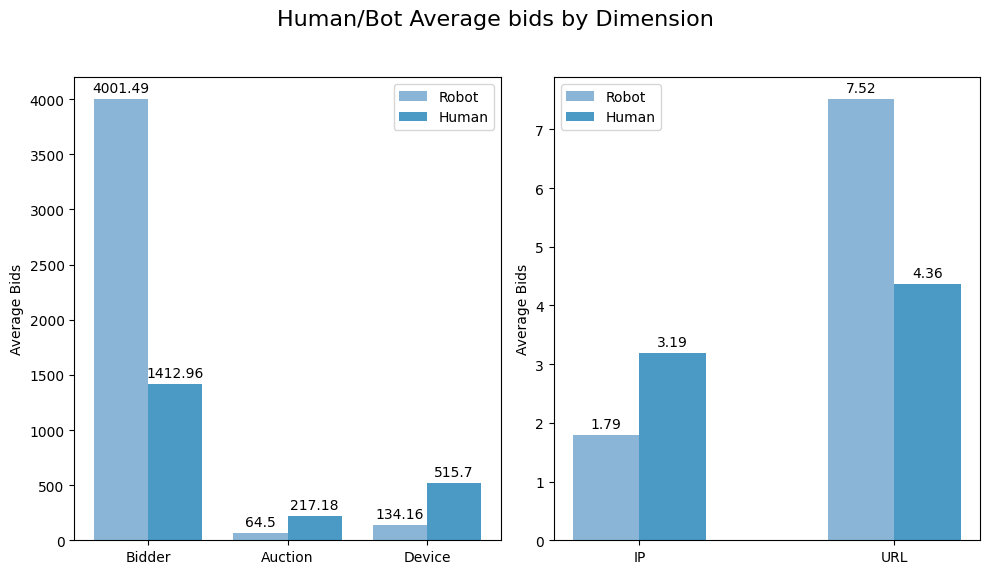

In [ ]:
# Data for the first subplot
labels_dim1 = ['Bidder', 'Auction', 'Device']
robot_values_dim1 = [average_bids_per_robot, average_bids_per_auction_robot, average_bids_per_device_robot]
human_values_dim1 = [average_bids_per_human, average_bids_per_auction_human, average_bids_per_device_human]

# Data for the second subplot
labels_dim2 = ['IP', 'URL']
robot_values_dim2 = [average_bids_per_ip_robot, average_bids_per_url_robot]
human_values_dim2 = [average_bids_per_ip_human, average_bids_per_url_human]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# First subplot
width_dim1 = 0.39
x_dim1 = np.arange(len(labels_dim1))

rects1_dim1 = axes[0].bar(x_dim1 - width_dim1/2, robot_values_dim1, width_dim1, label='Robot', color='#8BB5D6')
rects2_dim1 = axes[0].bar(x_dim1 + width_dim1/2, human_values_dim1, width_dim1, label='Human', color='#4B9AC6')

axes[0].set_ylabel('Average Bids')
axes[0].set_xticks(x_dim1)
axes[0].set_xticklabels(labels_dim1)
axes[0].legend()

def autolabel_dim1(rects):
    for rect in rects:
        height = rect.get_height()
        axes[0].annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel_dim1(rects1_dim1)
autolabel_dim1(rects2_dim1)

# Second subplot
width_dim2 = 0.26
x_dim2 = np.arange(len(labels_dim2))

rects1_dim2 = axes[1].bar(x_dim2 - width_dim2/2, robot_values_dim2, width_dim2, label='Robot', color='#8BB5D6')
rects2_dim2 = axes[1].bar(x_dim2 + width_dim2/2, human_values_dim2, width_dim2, label='Human', color='#4B9AC6')

axes[1].set_ylabel('Average Bids')
axes[1].set_xticks(x_dim2)
axes[1].set_xticklabels(labels_dim2)
axes[1].legend()

def autolabel_dim2(rects):
    for rect in rects:
        height = rect.get_height()
        axes[1].annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel_dim2(rects1_dim2)
autolabel_dim2(rects2_dim2)

fig.tight_layout()
fig.suptitle('Human/Bot Average bids by Dimension', fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

The dataset presents a notable imbalance, primarily comprising Human bids (~ 87%) compared to Bot bids (~ 13%). It is recommended to perform data resampling before entering the modeling phase.

Additionally, there is a substantial divergence in bid distributions between humans and bots across auctions, IPs, URLs, and devices.




In [ ]:
print('Merchandise Options:')
print(data['merchandise'].value_counts())

Merchandise Options:
sporting goods      1169328
mobile               596704
jewelry              592119
home goods           407888
office equipment     168374
furniture             87306
computers             21397
books and music       15174
auto parts             9757
clothing                476
Name: merchandise, dtype: int64


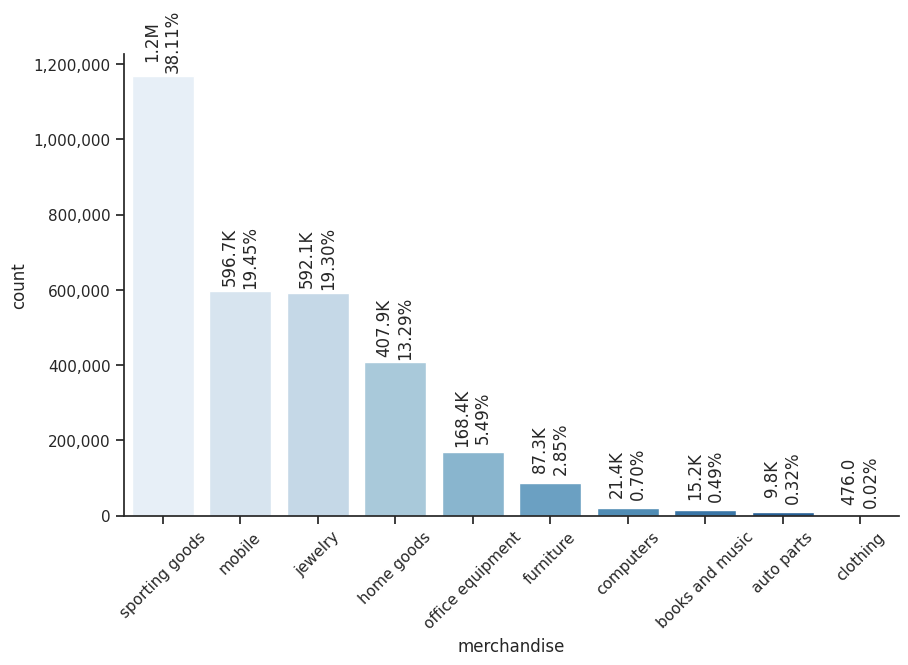

In [ ]:
merchandise_counts = data['merchandise'].value_counts()
order = merchandise_counts.index

plt.figure(figsize=(10, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
ax = sns.countplot(x='merchandise', data=data, order=order, palette='Blues')
plt.xticks(rotation=45)

for p in ax.patches:
    count_value = p.get_height()
    percentage_value = (count_value / len(data['merchandise'])) * 100  # Percentage Calculation

    # Count Value Formatting
    if count_value >= 1e6:
        formatted_count = f'{count_value / 1e6:.1f}M'
    elif count_value >= 1e3:
        formatted_count = f'{count_value / 1e3:.1f}K'
    else:
        formatted_count = str(count_value)

    # Percentage formatting
    formatted_percentage = f'{percentage_value:.2f}%'

    # Annotateion
    ax.annotate(f'{formatted_count}\n{formatted_percentage}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', rotation=90, xytext=(0, 25), textcoords='offset points')

# Format y-axis ticks with M and K
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.show()

#Feature Engineering

## Create Features

In [ ]:
import numpy as np
unique_bidder_ids = data['bidder_id'].unique()
n = len(unique_bidder_ids)
mapping = {k:v for k,v in zip(unique_bidder_ids,np.arange(n))}

In [ ]:
data['bidder_id'] = data['bidder_id'].map(mapping)

In [ ]:
data_transformed = pd.DataFrame({'bidder_id':np.arange(n)})

### Bidding Frequency per Bidder

In [ ]:
#Count the number of bids each bidder has made
data_transformed['bids_per_bidder'] = data.groupby('bidder_id')['bid_id'].count()

### Average Time between Bids per Bidder

In [ ]:
#Calculate the average time between consecutive bids for each bidder
data['time'] = pd.to_datetime(data['time']) #convert the 'time' column to datetime format
data['time_diff'] = data.groupby('bidder_id')['time'].diff().dt.seconds #calculate time differences between consecutive bids
data['time_diff'].fillna(0, inplace=True)#set 0 as default for nan elements
data_transformed['avg_time_between_bids'] = data.groupby('bidder_id')['time_diff'].mean()

### No. of Unique Devices and IP Addresses per Bidder:

In [ ]:
# Count the unique devices and IP addresses used by each bidder.
data_transformed['unique_devices'] = data.groupby('bidder_id')['device'].nunique()
data_transformed['unique_ips'] = data.groupby('bidder_id')['ip'].nunique()

### No. of Bids per Auction

In [ ]:
# Calculate the average number of bids made by each bidder per auction
data_transformed['avg_bids_per_auction'] = data.groupby(['bidder_id', 'auction'])['bid_id'].count().groupby('bidder_id').mean()

### Merchandise Diversity

In [ ]:
# Count the number of unique merchandise per bidder
data_transformed['unique_merchandise'] = data.groupby('bidder_id')['merchandise'].nunique()

### Geographic Diversity

In [ ]:
# Count the number of unique countries per bidder
data_transformed['unique_countries'] = data.groupby('bidder_id')['country'].nunique()

### URL Diversity

In [ ]:
# Count the number of unique URLs and merchandise categories per bidder
data_transformed['unique_urls'] = data.groupby('bidder_id')['url'].nunique()

### Target Variable

In [ ]:
data_transformed['label'] = data.groupby('bidder_id')['outcome'].max()

## Transformed Data Visualization

In [ ]:
data_transformed.shape

(1983, 10)

In [ ]:
data_transformed.head(n=7)

,bidder_id,bids_per_bidder,avg_time_between_bids,unique_devices,unique_ips,avg_bids_per_auction,unique_merchandise,unique_countries,unique_urls,label
0,0,19875,0.339069,1026,10220,33.459596,1,153,4492,0.0
1,1,30062,0.157574,403,20492,38.198221,1,125,295,0.0
2,2,192565,0.001101,2020,53405,257.439840,1,76,36518,0.0
3,3,9108,1.092776,367,6046,56.222222,1,23,1886,0.0
4,4,84319,0.010330,1610,27560,87.558671,1,125,13416,0.0
5,5,6355,1.746814,528,4870,16.901596,1,76,248,0.0
6,6,2390,5.248117,315,963,12.010050,1,78,1691,1.0


In [ ]:
def classify_features(df):
  categorical_features = []
  non_categorical_features = []
  discrete_features = []
  continuous_features = []

  for column in df.columns:
    if df[column].dtype in ['object', 'bool']:
      if df[column].nunique() < 15:
        categorical_features.append(column)
      else:
        non_categorical_features.append(column)
    elif df[column].dtype in ['int64', 'float64']:
      if df[column].nunique() < 10:
        discrete_features.append(column)
      else:
        continuous_features.append(column)

  return categorical_features, non_categorical_features, discrete_features, continuous_features

In [ ]:
categorical, non_categorical, discrete, continuous = classify_features(data_transformed)

In [ ]:
print('Categorical Features: ', categorical)
print('Non Categorical Features: ', non_categorical)
print('Discrete Features: ', discrete)
print('Continuous Features: ', continuous)

Categorical Features:  []
Non Categorical Features:  []
Discrete Features:  ['unique_merchandise', 'label']
Continuous Features:  ['bidder_id', 'bids_per_bidder', 'avg_time_between_bids', 'unique_devices', 'unique_ips', 'avg_bids_per_auction', 'unique_countries', 'unique_urls']


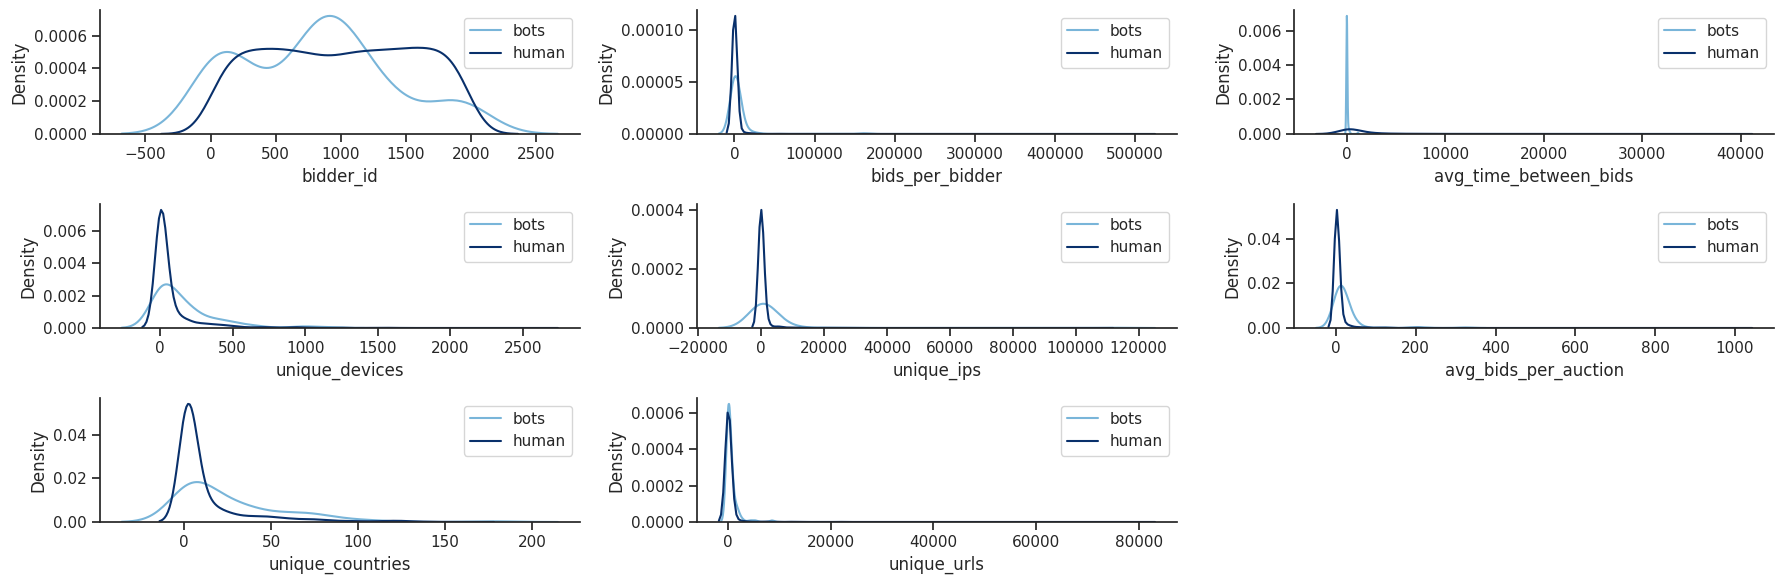

In [ ]:
num_rows = 3
num_cols = (len(continuous) + 1) // num_rows
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 6))
axes = axes.flatten()

# KDEs for bots and humans for each continuous variable
for i, var in enumerate(continuous):
    sns.kdeplot(data_transformed.loc[data_transformed['label'] == 1, var], color='#79B5D9', label='bots', ax=axes[i])
    sns.kdeplot(data_transformed.loc[data_transformed['label'] == 0, var], color='#09306B', label='human', ax=axes[i])
    # Plot labels and legend
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Density')
    axes[i].legend()

# Remove empty subplots if there are more than needed
for j in range(len(continuous), num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

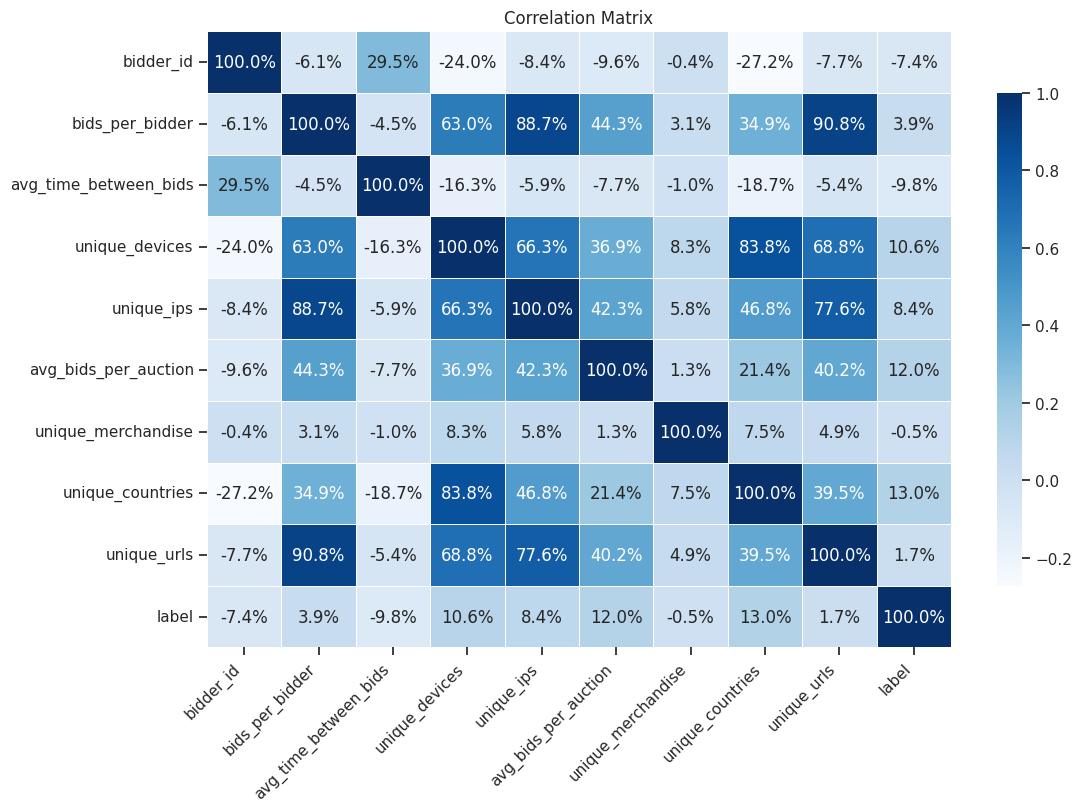

In [ ]:
corr_matrix = data_transformed.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".1%", linewidths=.5, cbar_kws={"shrink": 0.8})

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.title('Correlation Matrix')
plt.show()

# Data Processing and Oversampling

In [ ]:
x = data_transformed.drop(['bidder_id', 'label'], axis=1)
y = data_transformed['label']

# Add new synthetic data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

# Split dataset train 80% and test 20%
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, shuffle=True, random_state=42)

# Normalize the variables
standard_scaler = StandardScaler()
x_train_norm = standard_scaler.fit_transform(x_train)
x_test_norm = standard_scaler.transform(x_test)

# Machine Learning Models

##Logistic Regression

In [ ]:
# Initialize the logistic regression model
model = LogisticRegression()

# Train the model on the training set
model.fit(x_train_norm, y_train)

# Make predictions on the testing set
y_pred = model.predict(x_test_norm)

# Evaluate the accuracy of the model
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, model.predict(x_train_norm))

print(f"Accuracy train: {accuracy_train:.2f}")
print(f"Accuracy test: {accuracy_test:.2f}")

Accuracy train: 0.79
Accuracy test: 0.81


In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.65      0.78       387
         1.0       0.72      0.97      0.83       365

    accuracy                           0.81       752
   macro avg       0.84      0.81      0.80       752
weighted avg       0.84      0.81      0.80       752



In [ ]:
confusion_matrix(y_test, y_pred)

array([[252, 135],
       [ 11, 354]])

## Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(x_train_norm, y_train)

y_pred = rf.predict(x_test_norm)

# Evaluate the accuracy of the model
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, rf.predict(x_train_norm))

print(f"Accuracy train: {accuracy_train:.2f}")
print(f"Accuracy test: {accuracy_test:.2f}")

Accuracy train: 0.89
Accuracy test: 0.90


In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90       387
         1.0       0.87      0.93      0.90       365

    accuracy                           0.90       752
   macro avg       0.90      0.90      0.90       752
weighted avg       0.90      0.90      0.90       752



## SVM

In [ ]:
# Initialize the SVM Classifier
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

# Train the model on the standardized training set
svm_model.fit(x_train_norm, y_train)

# Make predictions on the standardized testing set
y_pred = svm_model.predict(x_test_norm)

# Evaluate the accuracy of the model
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, svm_model.predict(x_train_norm))

print(f"Accuracy train: {accuracy_train:.2f}")
print(f"Accuracy test: {accuracy_test:.2f}")

Accuracy train: 0.87
Accuracy test: 0.86


In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.82      0.86       387
         1.0       0.82      0.90      0.86       365

    accuracy                           0.86       752
   macro avg       0.86      0.86      0.86       752
weighted avg       0.86      0.86      0.86       752



## Gradient Boosting

In [ ]:
# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=200,max_depth=5, random_state=42)

# Train the model on the standardized training set
gb_model.fit(x_train_norm, y_train)

# Make predictions on the standardized testing set
y_pred = gb_model.predict(x_test_norm)

# Evaluate the accuracy of the model
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, gb_model.predict(x_train_norm))

print(f"Accuracy train: {accuracy_train:.2f}")
print(f"Accuracy test: {accuracy_test:.2f}")

Accuracy train: 0.98
Accuracy test: 0.95


In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95       387
         1.0       0.94      0.95      0.95       365

    accuracy                           0.95       752
   macro avg       0.95      0.95      0.95       752
weighted avg       0.95      0.95      0.95       752



In [ ]:
confusion_matrix(y_test, y_pred)

array([[365,  22],
       [ 18, 347]])

## Models' Benchmark

| Model                   | Accuracy | Precision | Recall | F1-score |
|-------------------------|----------|-----------|--------|----------|
| Logistic Regression     |   81%    |    72%    |   97%  |   83%    |
| Random Forest           |   90%    |    87%    |   93%  |   90%    |
| Support Vector Machine  |   86%    |    82%    |   90%  |   86%    |
| Gradient Boosting       |   95%    |    94%    |   95%  |   95%    |

Since the main objective is to better predict class 1 (bids made by robots), we should choose the model with the best Recall. In conclusion, the model that we might take into consideration in this use case would be Logistic Regression because it has the highest.